 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [6]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [7]:
class Video():
    
    def __init__(self):
        self.title = None
        self.length = timedelta() 
        self.link = generic_image
        
    def play(self):
        print(f"now playing {self.title}")
        display(Image(self.link))
    def pause(self):
        print("video paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [12]:
class Episode(Video):
    def __init__(self,data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image



## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [14]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.genres = []
        self.episodes = []
        
    def get_info(self):
        data = None
        while not data:
            search = input('What is the name of this series?')
            r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={search}')
            if r.status_code == 200:
                data = r.json()
            else:
                print(f"Series error: status code {r.status_code}")
                
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network'] ['name']
        else: self.network = data['webChannel']['name']
        
        #API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json() 
        else:
            print(f"episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input('Are you still watching? y/N')
                if watching.lower() not in ('yes','y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)

In [15]:
first_show = Series()
first_show.get_info()

In [16]:
len(first_show)

16

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


now playing Diamond of the First Water


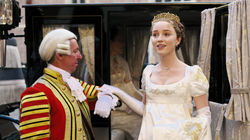

now playing Shock and Delight


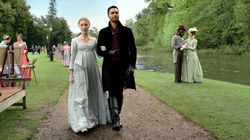

now playing Art of the Swoon


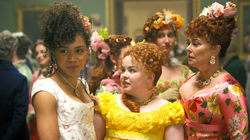

now playing An Affair of Honor


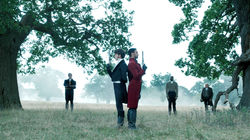

now playing The Duke and I


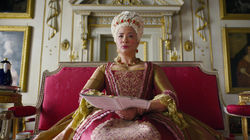

now playing Swish


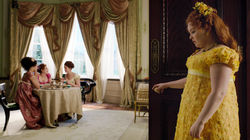

now playing Oceans Apart


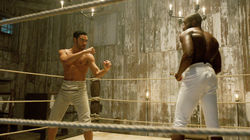

now playing After the Rain


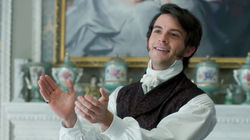

now playing Capital R Rake


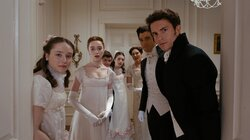

In [17]:
first_show.watch()

In [21]:
class Theater:
    def __init__(self):
        self.users = []
        self.watchlist = []
        self.current_user = None
        
    def add_user(self, name = ''):
        if not name:
            name = input('What is the name of your new user? ')
        self.users.append(name)
        
    def choose_user(self):
        while True:
            print('Users')
            for user in self.users:
                print(user)
            current = input('Choose a user')
            if current in self.users:
                self.current_user = current
                print(f"{self.current_user} is now watching")
                break
            else:
                print(f"{current} is not a user.")
    
    def add_to_watchlist(self):
        show = Series()
        show.get_info()
        self.watchlist.append(show)
        print(f'{show.title} has been added to your watchlist')
        
    def choose_from_watchlist(self):
        for series in self.watchlist:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f'\nSummary: \n{series.summary}')
        
        watch = input('What do you want to watch?')
        
        for series in self.watchlist:
            if series.name.lower() == watch.lower():
                series.play()
        response = input(f"{watch} is not in your watchlist. would you like to add it? y/N")
        if response in ('y','yes'):
            self.add_to_watchlist()
            self.watchlist[-1].play()
            
            
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        
        if self.users:
            self.choose_user()
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watchlist
            Add    - Add a new user
            Quit   - Close the app
        """)
        
        while True:
            response = input("What would you like to do? ( search, watch, add, quit ) ")
            
            if response.lower() == 'search':
                self.add_to_watchlist()
            elif response.lower() == 'watch':
                self.choose_from_watchlist()
            elif response.lower() == 'add':
                self.add_user()
                self.choose_user()
            elif response.lower() == 'quit':
                print('Thanks for watching...')
                break
            else:
                print('Incorrect input... Try Again.')

In [28]:
codeflix= Theater()
codeflix.run()

JD

            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watchlist
            Add    - Add a new user
            Quit   - Close the app
        
One Piece has been added to your watchlist


<__main__.Series object at 0x7fadb0787f70> | Episodes: 1015

Summary: 
<p><b>One Piece</b> animation is based on the successful comic by Eiichiro Oda. The comic has sold more than 260 million copies. The success doesn't stop; the <i>One Piece</i> animation series is in its top 5 TV ratings for kids programs in Japan for past few years and the series' most recent feature film title <i>"One Piece Film Z" </i>which was released on December 2012 has gathered 5.6 million viewers so far. The success goes beyond borders; receives high popularity on animation at terrestrial channel in Taiwan, no.1 rating on animation at a DTT channel in France, received high popularity among age 3-13 on a terrestrial channel in Germany in y

AttributeError: 'Series' object has no attribute 'name'

In [31]:
second_show = Series()
second_show.get_info()

now playing I'm Luffy! The Man Who's Gonna Be King of the Pirates!


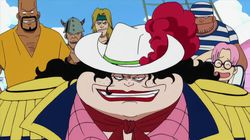

now playing Enter the Great Swordsman! Pirate Hunter Roronoa Zoro!


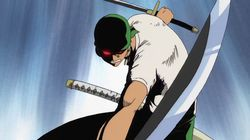

now playing Morgan versus Luffy! Who's the Mysterious Pretty Girl?


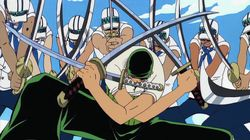

now playing Luffy's Past! Enter Red-Haired Shanks!


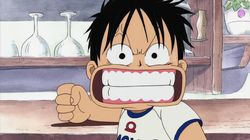

now playing A Terrifying Mysterious Power! Captain Buggy, the Clown Pirate!


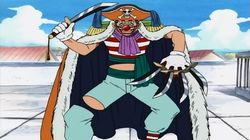

now playing Desperate Situation! Beast Tamer Mohji vs. Luffy!


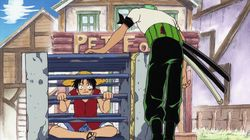

In [32]:
second_show.watch()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

In [38]:
class Theater:
    def __init__(self):
        self.users = []
        self.watchlist = []
        self.current_user = None
        self.watched = []
  
    def watched_shows(self):
        if series in self.watchlist:
            return self.watched.append(series.play)
        else:
            return self.watchlist[-1].play()



    def add_user(self, name = ''):
        if not name:
            name = input('What is the name of your new user? ')
        self.users.append(name)
        
    def choose_user(self):
        while True:
            print('Users')
            for user in self.users:
                print(user)
            current = input('Choose a user')
            if current in self.users:
                self.current_user = current
                print(f"{self.current_user} is now watching")
                break
            else:
                print(f"{current} is not a user.")
    
    def add_to_watchlist(self):
        show = Series()
        show.get_info()
        self.watchlist.append(show)
        print(f'{show.title} has been added to your watchlist')
        
    def choose_from_watchlist(self):
        for series in self.watchlist:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f'\nSummary: \n{series.summary}')
        
        watch = input('What do you want to watch?')
        
        for series in self.watchlist:
            if series.name.lower() == watch.lower():
                series.play()
        response = input(f"{watch} is not in your watchlist. would you like to add it? y/N")
        if response in ('y','yes'):
            self.add_to_watchlist()
            self.watchlist[-1].play()
            
            
    def run(self):
        """
            Method allowing users to choose a series and play episodes.
        """
        
        if self.users:
            self.choose_user()
        else:
            name = input('Create a profile: ')
            self.add_user(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like to do?
            
            Search - Search for shows
            Watch  - Pick something from your watchlist
            Add    - Add a new user
            Quit   - Close the app
        """)
        
        while True:
            response = input("What would you like to do? ( search, watch, add, quit ) ")
            
            if response.lower() == 'search':
                self.add_to_watchlist()
            elif response.lower() == 'watch':
                self.choose_from_watchlist()
            elif response.lower() == 'add':
                self.add_user()
                self.choose_user()
            elif response.lower() == 'quit':
                print('Thanks for watching...')
                break
            else:
                print('Incorrect input... Try Again.')



# i added the "watched" method to improve the streaming service by keeping a record of shows already watched. this can later be used to give viewing suggestiosn through a different class/methods

0